## 0. scikit-learn installation

In [58]:
!conda install scikit-learn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.5
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/david/miniconda3/envs/ironhack

  added / updated specs:
    - scikit-learn


The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1c-h516909a_0 --> pkgs/main::openssl-1.1.1c-h7b6447c_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.6.1~ --> pkgs/main::ca-certificates-2019.5.15-0
  certifi             conda-forge::certifi-2019.6.16-py37_1 --> pkgs/main::certifi-2019.6.16-py37_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## 1. python imports

In [3]:
import numpy as np
import pandas as pd

scikit-learn includes:
* utilities:
    * cheatsheet
    * test dataset generation
    * model selection and evaluation (cv, metrics, train test split, etc.)
    * preprocessing (imputers, scalers, etc.)
* modeling:
    * pipelines
    * supervised models
    * unsupervised models

## 2. utilities

### 2.1 cheatsheet

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.2 test dataset generation

In [4]:
from sklearn.datasets import (make_classification, 
                              make_moons, 
                              make_circles,
                              load_diabetes)

For a sample dataset like diabetes:

In [59]:
diabetes_raw = load_diabetes()

In [60]:
diabetes_df = pd.DataFrame(data=np.hstack([diabetes_raw.data, diabetes_raw.target.reshape(-1,1)]),
                           columns=diabetes_raw.feature_names + ['target'])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [61]:
diabetes_raw.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

Loading a dataset from url:

In [10]:
!conda install requests -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.5
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [20]:
import requests
from pandas.io.json import json_normalize

In [22]:
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
json_data = requests.get(url).json()

In [26]:
pokemon = json_normalize(json_data['pokemon'])
pokemon.head()

,avg_spawns,candy,candy_count,egg,height,id,img,multipliers,name,next_evolution,num,prev_evolution,spawn_chance,spawn_time,type,weaknesses,weight
0,69.0,Bulbasaur Candy,25.0,2 km,0.71 m,1,http://www.serebii.net/pokemongo/pokemon/001.png,[1.58],Bulbasaur,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",001,NaN,0.690,20:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",6.9 kg
1,4.2,Bulbasaur Candy,100.0,Not in Eggs,0.99 m,2,http://www.serebii.net/pokemongo/pokemon/002.png,"[1.2, 1.6]",Ivysaur,"[{'num': '003', 'name': 'Venusaur'}]",002,"[{'num': '001', 'name': 'Bulbasaur'}]",0.042,07:00,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",13.0 kg
2,1.7,Bulbasaur Candy,NaN,Not in Eggs,2.01 m,3,http://www.serebii.net/pokemongo/pokemon/003.png,None,Venusaur,NaN,003,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0.017,11:30,"[Grass, Poison]","[Fire, Ice, Flying, Psychic]",100.0 kg
3,25.3,Charmander Candy,25.0,2 km,0.61 m,4,http://www.serebii.net/pokemongo/pokemon/004.png,[1.65],Charmander,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",004,NaN,0.253,08:45,[Fire],"[Water, Ground, Rock]",8.5 kg
4,1.2,Charmander Candy,100.0,Not in Eggs,1.09 m,5,http://www.serebii.net/pokemongo/pokemon/005.png,[1.79],Charmeleon,"[{'num': '006', 'name': 'Charizard'}]",005,"[{'num': '004', 'name': 'Charmander'}]",0.012,19:00,[Fire],"[Water, Ground, Rock]",19.0 kg


dataset generation utilities

In [67]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1,
                           random_state=1, n_clusters_per_class=1)

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline

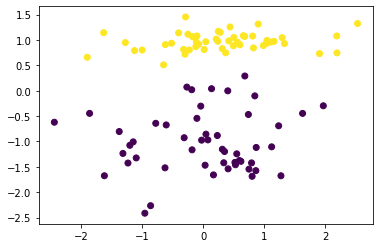

In [69]:
plt.scatter(x=X[:,0], y=X[:,1], c=y);

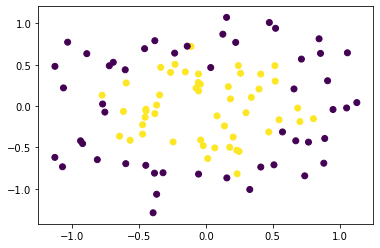

In [34]:
X, y = make_circles(noise=0.2, 
                    factor=0.5, 
                    random_state=1)

plt.scatter(x=X[:,0], y=X[:,1], c=y);

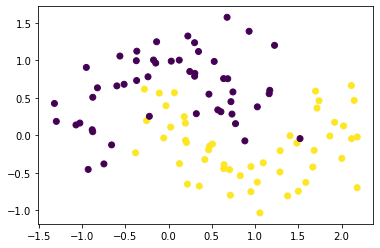

In [70]:
X, y = make_moons(noise=0.3, 
                  random_state=0)

plt.scatter(x=X[:,0], y=X[:,1], c=y);

### 2.3 model selection and evaluation

https://scikit-learn.org/stable/model_selection.html#model-selection

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=10, 
                               n_jobs = -1, 
                               scoring='roc_auc')

rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [42]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rf_random.best_score_

0.9623529411764706

In [44]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [45]:
rf_random.cv_results_

{'mean_fit_time': array([1.315576  , 1.34968241, 2.39635984, 2.31721067, 1.64574218,
        1.11782384, 2.3142999 , 1.15418053, 0.55683422, 3.5511984 ,
        0.94680993, 0.53361543, 2.11380267, 0.86275657, 1.0048906 ,
        2.32982516, 1.04873657, 1.79769731, 0.72346242, 0.81753206,
        1.63661544, 2.6206003 , 2.19722875, 2.16916188, 2.86495423,
        0.51716654, 1.61003153, 1.94691229, 0.31512403, 2.04654384,
        0.91692996, 1.00009878, 2.34687901, 1.32711156, 0.21811891,
        1.96328195, 1.4547178 , 1.04137921, 2.28313716, 0.48015952,
        0.23542889, 1.39365745, 2.49179427, 1.6484828 , 0.23882302,
        0.34314831, 0.70520258, 1.26689363, 0.27633802, 1.79533831,
        0.7318995 , 1.35738079, 0.81115858, 0.7110335 , 2.37418795,
        2.24743223, 2.18687439, 0.67198976, 1.59997749, 1.73637637,
        2.32168269, 0.26444968, 0.80223846, 1.73938553, 1.64100099,
        1.20883719, 1.44800973, 0.94919411, 2.23932274, 1.9319241 ,
        0.47590518, 1.58645296,

## 3. modeling

What is happening with scikit-learn? https://www.reddit.com/r/learnmachinelearning/comments/b91f8w/primary_ml_software_used_by_top5_teams_on_kaggle/

In [48]:
!conda install -c conda-forge lightgbm -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.5
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/david/miniconda3/envs/ironhack

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py37_1         149 KB  conda-forge
    lightgbm-2.2.3             |   py37hf484d3e_0        1000 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-cert

In [72]:
ctr = pd.read_csv('/home/david/Downloads/data/train.gz', nrows=1e6, index_col='id')
ctr.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
id,,,,,,,,,,,,,,,,,,,,,
1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,-1,79
1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15706,320,50,1722,0,35,100084,79
1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157


In [73]:
from lightgbm import LGBMClassifier

features = ctr.columns.drop('click')
target = 'click'

for cat_col in ctr.select_dtypes(include='object'):
    ctr[cat_col] = ctr[cat_col].astype('category')

model = LGBMClassifier()
model.fit(X=ctr[features], y=ctr[target])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)